<a href="https://colab.research.google.com/github/rayyankayra/HeartDisease/blob/main/Tes_Sertifikat_ADS_Rayyan_Kaira_Paraditra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KEBUTUHAN DATA

Tugas Bisnis Data Science

Saya ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit kardiovaskuler.

Tugas Teknis Data Science

Membuat model klasifikasi menggunakan decision tree dan satu model pilihan lainnya, untuk memprediksi apakah seorang pasien mengidap penyakit jantung atau tidak. Berdasarkan hasil pemodelan data, anda diminta untuk mengevaluasi kinerja model klasifikasi dan menginterpretasikan fitur-fitur mana yang paling berpengaruh terhadap hasil prediksi fitur target.

Kinerja model diukur menggunakan metrik berikut:

• Confusion matrix
• Accuracy
• Precision
• Recall
• F1-score

# DATA UNDERSTANDING

## 1. Importing libraries and dataset

In [ ]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Import dataset

df = pd.read_csv('/content/drive/MyDrive/Dataset Gcollab/heart(1).csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2. Data Attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


MENENTUKAN OBJEK DATA

ataset heart.csv memiliki 918 baris dan 12 kolom yang ditafsirkan oleh df.info

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Menghitung jumlah kolom dan baris
num_rows, num_cols = df.shape

# Menampilkan jumlah kolom dan baris
print(f"Jumlah baris dalam dataset: {num_rows}")
print(f"Jumlah kolom dalam dataset: {num_cols}")

Jumlah baris dalam dataset: 918
Jumlah kolom dalam dataset: 12


KELENGKAPAN DATA

Berikut adalah beberapa temuan dari ringkasan statistik dasar dataset ini:

    Age: Terdapat nilai minimum 0 dan maksimum 177, yang tampak tidak wajar.
    Sex: Ada 2 kategori (M dan F).
    ChestPainType: Ada 4 kategori (ATA, NAP, ASY, TA).
    RestingBP: Terdapat nilai minimum 0 yang tidak realistis untuk tekanan darah.
    Cholesterol: Terdapat nilai minimum 0 yang juga tidak realistis untuk kolesterol.
    FastingBS: Nilai biner (0 atau 1).
    RestingECG: Ada 3 kategori (Normal, ST, LVH).
    MaxHR: Denyut jantung maksimal bervariasi antara 60 dan 202.
    ExerciseAngina: Nilai biner (Y atau N).
    Oldpeak: Nilai bervariasi antara -2.6 dan 6.2.
    ST_Slope: Ada 3 kategori (Up, Flat, Down).
    HeartDisease: Nilai biner (0 atau 1), dengan 55.34% pasien memiliki penyakit jantung.

In [ ]:
# Mapping manual untuk encoding 'ChestPainType'
chestpaintype_mapping = {
    'ATA': 0,
    'NAP': 1,
    'ASY': 2,
    'TA': 3
}

# Mapping manual untuk encoding 'RestingECG'
restingecg_mapping = {
    'Normal': 0,
    'ST': 1,
    'LVH': 2,
}

# Mapping manual untuk encoding 'ST_Slope'
stslope_mapping = {
    'Up': 0,
    'Flat': 1,
    'Down': 2,
}

# Encoding manual
df['chestpaintype_encoded'] = df['ChestPainType'].map(chestpaintyp_mapping)

# Encoding manual
df['restingecg_encoded'] = df['RestingECG'].map(restingecg_mapping)

# Encoding manual
df['stslope_encoded'] = df['ST_Slope'].map(stslope_mapping)

In [ ]:
# Label Encoding untuk kolom 'Sex' dan 'ExerciseAngina'
label_encoders = {}
for col in ['Sex', 'ExerciseAngina']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,chestpaintype_encoded,restingecg_encoded,stslope_encoded
0,NaN,1,ATA,140,289,0,Normal,172,0,0.0,Up,0,0,0,0
1,49.0,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1,1,0,1
2,37.0,1,ATA,130,283,0,ST,98,0,0.0,Up,0,0,1,0
3,48.0,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1,2,0,1
4,54.0,1,NAP,150,195,0,Normal,122,0,0.0,Up,0,1,0,0


In [ ]:
df = df.drop(['ST_Slope', 'ChestPainType', 'RestingECG'], axis=1)

In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,chestpaintype_encoded,restingecg_encoded,stslope_encoded
0,NaN,1,140,289,0,172,0,0.0,0,0,0,0
1,49.0,0,160,180,0,156,0,1.0,1,1,0,1
2,37.0,1,130,283,0,98,0,0.0,0,0,1,0
3,48.0,0,138,214,0,108,1,1.5,1,2,0,1
4,54.0,1,150,195,0,122,0,0.0,0,1,0,0


In [ ]:
# Hitung matriks korelasi
correlation_matrix = df.corr()

# Ambil korelasi dengan kolom 'HeartDisease'
correlations_with_heart_disease = correlation_matrix['HeartDisease'].abs().sort_values(ascending=False).iloc[1:]

print("Korelasi semua kolom dengan 'HeartDisease':")
print(correlations_with_heart_disease)

Korelasi semua kolom dengan 'HeartDisease':
stslope_encoded          0.558771
ExerciseAngina           0.494282
chestpaintype_encoded    0.459017
Oldpeak                  0.403951
MaxHR                    0.400421
Sex                      0.284825
FastingBS                0.267291
Cholesterol              0.232741
Age                      0.212565
RestingBP                0.107589
restingecg_encoded       0.061011
Name: HeartDisease, dtype: float64


In [ ]:
# Drop Kolom yang tidak di Top 5 Korelasi

df = df.drop(['Sex', 'FastingBS', 'Cholesterol', 'Age', 'RestingBP', 'restingecg_encoded'], axis=1)

## 3. Visualization of data distribution

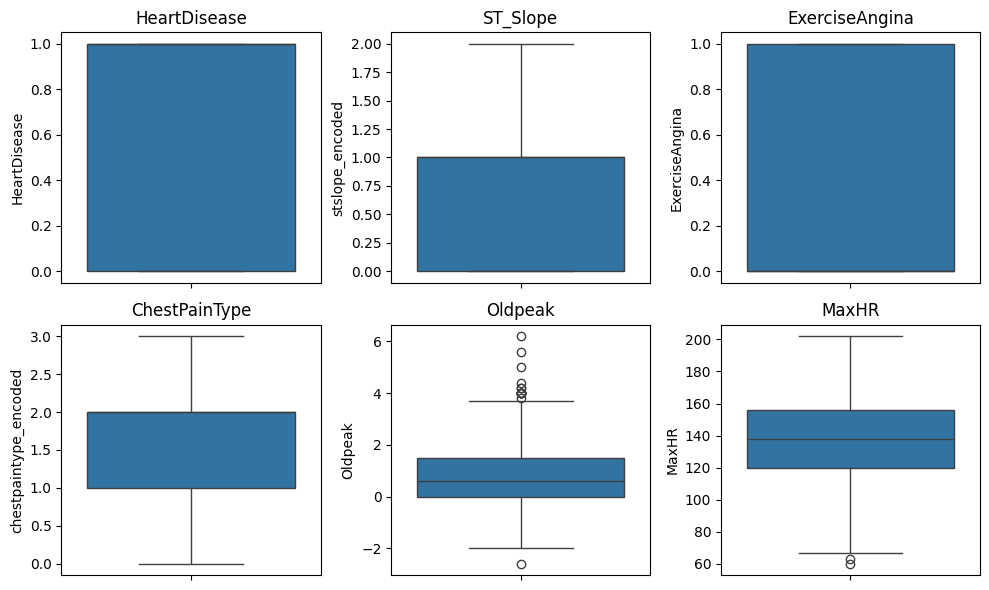

In [ ]:
# Plot boxplot untuk semua kolom numerik menggunakan Seaborn
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['HeartDisease'])
plt.title('HeartDisease')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['stslope_encoded'])
plt.title('ST_Slope')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['ExerciseAngina'])
plt.title('ExerciseAngina')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['chestpaintype_encoded'])
plt.title('ChestPainType')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['Oldpeak'])
plt.title('Oldpeak')

plt.subplot(2, 3, 6)
sns.boxplot(y=df['MaxHR'])
plt.title('MaxHR')

plt.tight_layout()
plt.show()

In [ ]:
# Plot boxplot untuk semua kolom numerik menggunakan Seaborn
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['HeartDisease'])
plt.title('HeartDisease')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['Age'])
plt.title('Age')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['Cholesterol'])
plt.title('Cholesterol')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['BloodPressure'])
plt.title('BloodPressure')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['BloodSugar'])
plt.title('BloodSugar')

plt.subplot(2, 3, 6)
sns.boxplot(data=df[['Weight', 'Height']])
plt.title('Weight & Height')

plt.tight_layout()
plt.show()

Persentase nilai untuk kolom Sex:
Sex
M    78.964758
F    21.035242
Name: proportion, dtype: float64

Persentase nilai untuk kolom ChestPainType:
ChestPainType
ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: proportion, dtype: float64

Persentase nilai untuk kolom FastingBS:
FastingBS
0    76.688453
1    23.311547
Name: proportion, dtype: float64

Persentase nilai untuk kolom RestingECG:
RestingECG
Normal    60.130719
LVH       20.479303
ST        19.389978
Name: proportion, dtype: float64

Persentase nilai untuk kolom ExerciseAngina:
ExerciseAngina
N    59.586057
Y    40.413943
Name: proportion, dtype: float64

Persentase nilai untuk kolom ST_Slope:
ST_Slope
Flat    50.108932
Up      43.028322
Down     6.862745
Name: proportion, dtype: float64

Persentase nilai untuk kolom HeartDisease:
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64



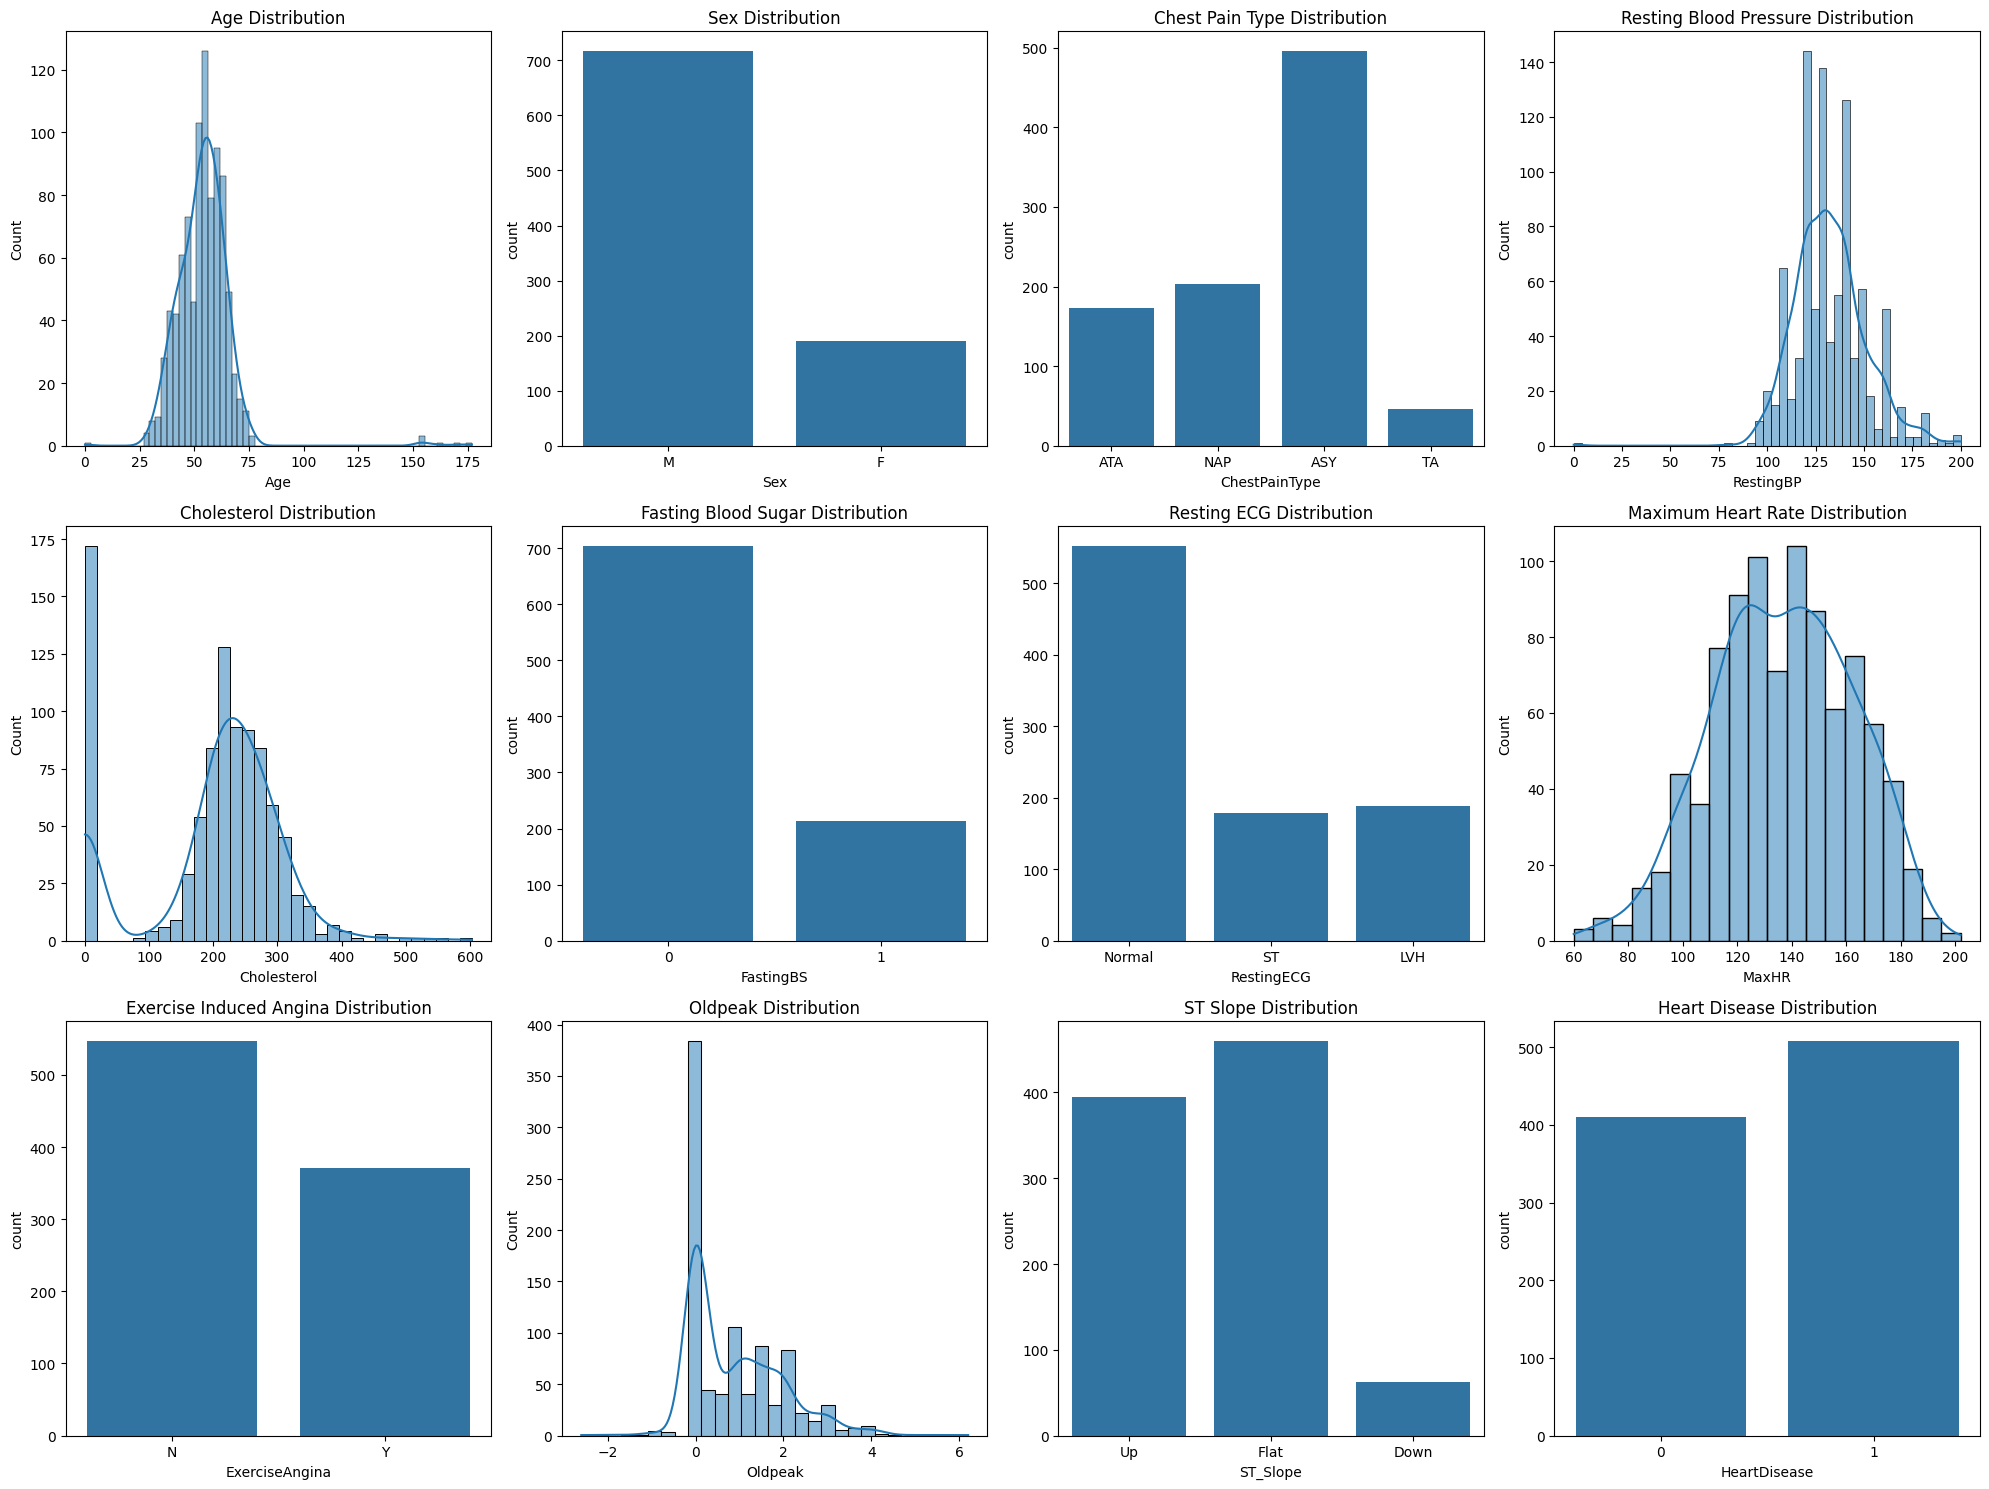

In [ ]:
# Menghitung persentase setiap nilai untuk kolom-kolom yang diminta
def calculate_percentage(df, column):
    return df[column].value_counts(normalize=True) * 100

# Daftar kolom untuk dihitung persentasenya
columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Menghitung dan menampilkan persentase
for col in columns:
    percentage = calculate_percentage(df, col)
    print(f"Persentase nilai untuk kolom {col}:")
    print(percentage)
    print()

# Plotting
plt.figure(figsize=(20, 15))

# Age
plt.subplot(3, 4, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

# Sex
plt.subplot(3, 4, 2)
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')

# ChestPainType
plt.subplot(3, 4, 3)
sns.countplot(x='ChestPainType', data=df)
plt.title('Chest Pain Type Distribution')

# RestingBP
plt.subplot(3, 4, 4)
sns.histplot(df['RestingBP'], kde=True)
plt.title('Resting Blood Pressure Distribution')

# Cholesterol
plt.subplot(3, 4, 5)
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution')

# FastingBS
plt.subplot(3, 4, 6)
sns.countplot(x='FastingBS', data=df)
plt.title('Fasting Blood Sugar Distribution')

# RestingECG
plt.subplot(3, 4, 7)
sns.countplot(x='RestingECG', data=df)
plt.title('Resting ECG Distribution')

# MaxHR
plt.subplot(3, 4, 8)
sns.histplot(df['MaxHR'], kde=True)
plt.title('Maximum Heart Rate Distribution')

# ExerciseAngina
plt.subplot(3, 4, 9)
sns.countplot(x='ExerciseAngina', data=df)
plt.title('Exercise Induced Angina Distribution')

# Oldpeak
plt.subplot(3, 4, 10)
sns.histplot(df['Oldpeak'], kde=True)
plt.title('Oldpeak Distribution')

# ST_Slope
plt.subplot(3, 4, 11)
sns.countplot(x='ST_Slope', data=df)
plt.title('ST Slope Distribution')

# HeartDisease
plt.subplot(3, 4, 12)
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')

plt.tight_layout()
plt.show()

# DATA PROCESSING

## 1. Missing value handling

In [ ]:
missing_data = df.isnull().sum()
missing_data

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [ ]:
# Fill missing values in 'Age' with the median value
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

# Fill missing values in 'Sex' with the mode value
sex_mode = df['Sex'].mode()[0]
df['Sex'].fillna(sex_mode, inplace=True)

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print(missing_values_after)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Missing Values ditangani, sekarang mencari outlier dari distribusi data, mulai dari Age yang nilai maksimalnya abnormal, di angka 177.

## 2. Outlier handling

### 2.1 Visualisasi boxplot kolom numerik untuk menemukan outlier

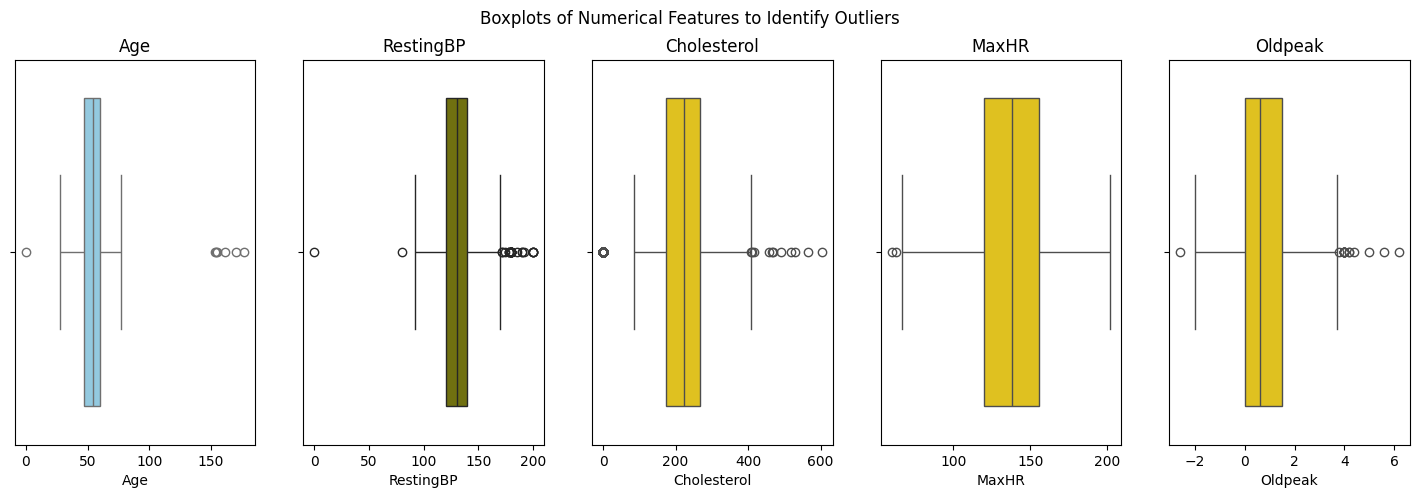

In [ ]:
# Plotting boxplots to identify outliers in the numerical columns
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
fig.suptitle('Boxplots of Numerical Features to Identify Outliers')

sns.boxplot(x=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Age')

sns.boxplot(x=df['RestingBP'], ax=axes[1], color='olive')
axes[1].set_title('RestingBP')

sns.boxplot(x=df['Cholesterol'], ax=axes[2], color='gold')
axes[2].set_title('Cholesterol')

sns.boxplot(x=df['MaxHR'], ax=axes[3], color='gold')
axes[3].set_title('MaxHR')

sns.boxplot(x=df['Oldpeak'], ax=axes[4], color='gold')
axes[4].set_title('Oldpeak')

plt.show()

### 2.2 Menghitung persentase outlier pada kolom numerik menggunakan metode IQR

In [ ]:
# Define a function to calculate the number of outliers using IQR method
def calculate_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

# Calculate outliers for each numerical column
outliers_age = calculate_outliers(df['Age'])
outliers_restingbp = calculate_outliers(df['RestingBP'])
outliers_cholesterol = calculate_outliers(df['Cholesterol'])
outliers_maxhr = calculate_outliers(df['MaxHR'])
outliers_oldpeak = calculate_outliers(df['Oldpeak'])

# Calculate total data points and percentage of outliers
total_data = len(df)
percentage_age = (outliers_age / total_data) * 100
percentage_restingbp = (outliers_restingbp / total_data) * 100
percentage_cholesterol = (outliers_cholesterol / total_data) * 100
percentage_maxhr = (outliers_maxhr / total_data) * 100
percentage_oldpeak = (outliers_oldpeak / total_data) * 100

percentage_age, percentage_restingbp, percentage_cholesterol, percentage_maxhr, percentage_oldpeak

(0.7625272331154684,
 3.0501089324618738,
 19.934640522875817,
 0.2178649237472767,
 1.7429193899782136)

In [ ]:
# Define a function to calculate the number of outliers using IQR method
def calculate_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

# Calculate outliers for each numerical column
outliers_exerciseangina = calculate_outliers(df['ExerciseAngina'])
outliers_stslope = calculate_outliers(df['stslope_encoded'])
outliers_chestpaintype = calculate_outliers(df['chestpaintype_encoded'])
outliers_maxhr = calculate_outliers(df['MaxHR'])
outliers_oldpeak = calculate_outliers(df['Oldpeak'])

# Calculate total data points and percentage of outliers
total_data = len(df)
percentage_exerciseangina = (outliers_exerciseangina / total_data) * 100
percentage_stslope = (outliers_stslope / total_data) * 100
percentage_chestpaintype = (outliers_chestpaintype / total_data) * 100
percentage_maxhr = (outliers_maxhr / total_data) * 100
percentage_oldpeak = (outliers_oldpeak / total_data) * 100

percentage_exerciseangina, percentage_stslope, percentage_chestpaintype, percentage_maxhr, percentage_oldpeak

(0.0, 0.0, 0.0, 0.2178649237472767, 1.7429193899782136)

In [ ]:
print(df.columns)

Index(['MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease',
       'chestpaintype_encoded', 'stslope_encoded'],
      dtype='object')


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.101307,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.938727,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.457200,131.152617,198.799564,0.233115,136.973441,0.834420,0.553377
std,9.357937,15.597592,109.384145,0.423046,25.215612,0.957547,0.497414
min,28.000000,92.000000,0.000000,0.000000,67.000000,-2.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,3.700000,1.000000


In [ ]:
# Fungsi untuk mendeteksi outlier berdasarkan IQR
def find_outliers_iqr(df):
    outliers = pd.DataFrame(columns=df.columns)

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers = pd.concat([outliers, col_outliers], axis=0)

    return outliers

outliers = find_outliers_iqr(df)

print("Outliers based on IQR:")
print(outliers)

Outliers based on IQR:
    MaxHR ExerciseAngina  Oldpeak HeartDisease chestpaintype_encoded  \
370    63              1      0.5            1                     2   
390    60              0      0.0            1                     2   
68     82              1      4.0            1                     2   
166   140              1      5.0            1                     2   
324   133              0     -2.6            1                     2   
500   140              1      4.0            1                     2   
521   135              1      4.0            1                     2   
537   130              1      4.0            1                     2   
559   102              1      4.0            1                     2   
624   154              0      4.0            1                     2   
702   145              0      4.2            0                     3   
732   133              1      4.0            1                     2   
771   111              1      5.6        

### 2.3 Handling outlier berdasarkan persebaran

#### 2.3.1 Outlier kolom Age, RestingBP, MaxHR, Oldpeak dengan persentase dari seluruh dataset < 5%

In [ ]:
# Hitung mean dari kolom Age
mean_age = df['Age'].mean()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ganti nilai outlier dengan mean
df['Age'] = df['Age'].apply(lambda x: mean_age if x < lower_bound or x > upper_bound else x)

In [ ]:
# Hitung mean dari kolom RestingBP
mean_restingbp = df['RestingBP'].mean()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ganti nilai outlier dengan mean
df['RestingBP'] = df['RestingBP'].apply(lambda x: mean_restingbp if x < lower_bound or x > upper_bound else x)

In [ ]:
# Hitung mean dari kolom MaxHR
mean_maxhr = df['MaxHR'].mean()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ganti nilai outlier dengan mean
df['MaxHR'] = df['MaxHR'].apply(lambda x: mean_maxhr if x < lower_bound or x > upper_bound else x)

In [ ]:
# Hitung mean dari kolom Oldpeak
mean_oldpeak = df['Oldpeak'].mean()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ganti nilai outlier dengan mean
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: mean_oldpeak if x < lower_bound or x > upper_bound else x)

In [ ]:
# Function to calculate outliers
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Calculate outliers in 'Age' and 'RestingBP'
outliers_age = calculate_outliers(df, 'Age')
outliers_restingbp = calculate_outliers(df, 'RestingBP')
outliers_maxhr = calculate_outliers(df, 'MaxHR')
outliers_oldpeak = calculate_outliers(df, 'Oldpeak')

outliers_age, outliers_restingbp, outliers_maxhr, outliers_oldpeak

(0, 0, 0, 0)

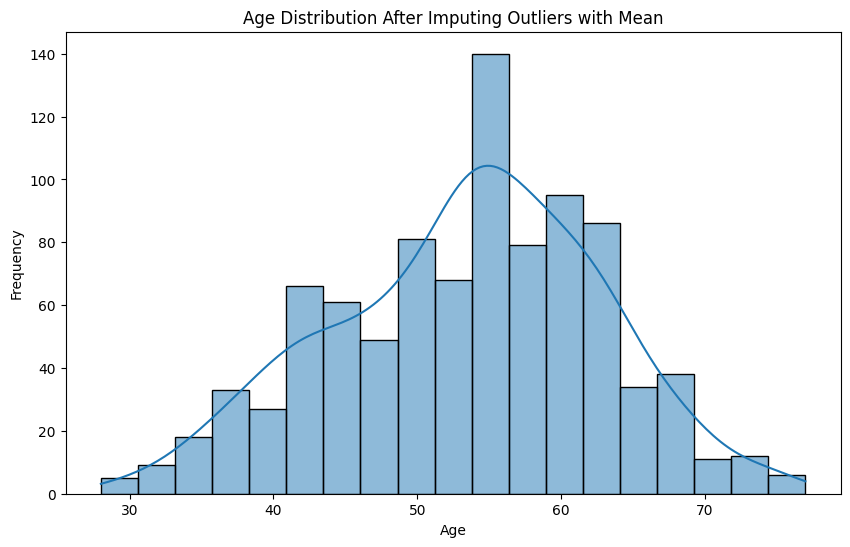

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution After Imputing Outliers with Mean')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

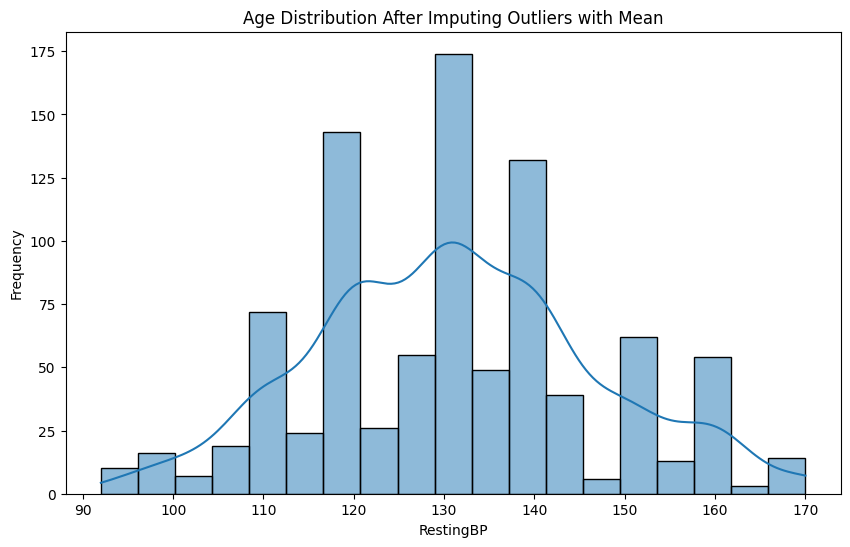

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['RestingBP'], kde=True)
plt.title('Age Distribution After Imputing Outliers with Mean')
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.show()

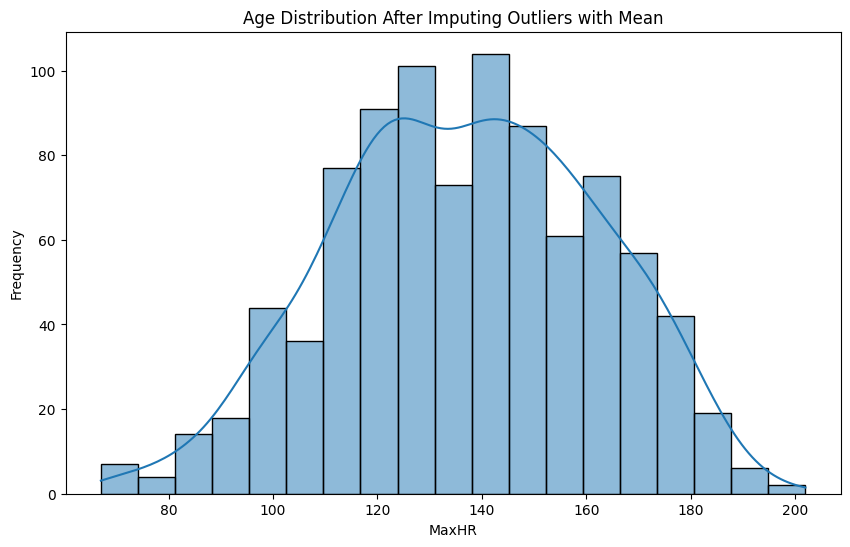

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['MaxHR'], kde=True)
plt.title('Age Distribution After Imputing Outliers with Mean')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

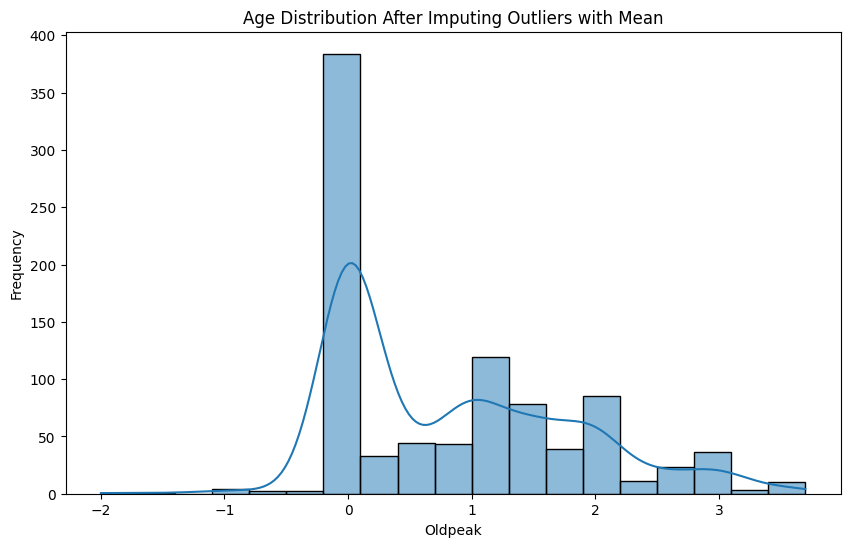

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Oldpeak'], kde=True)
plt.title('Age Distribution After Imputing Outliers with Mean')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

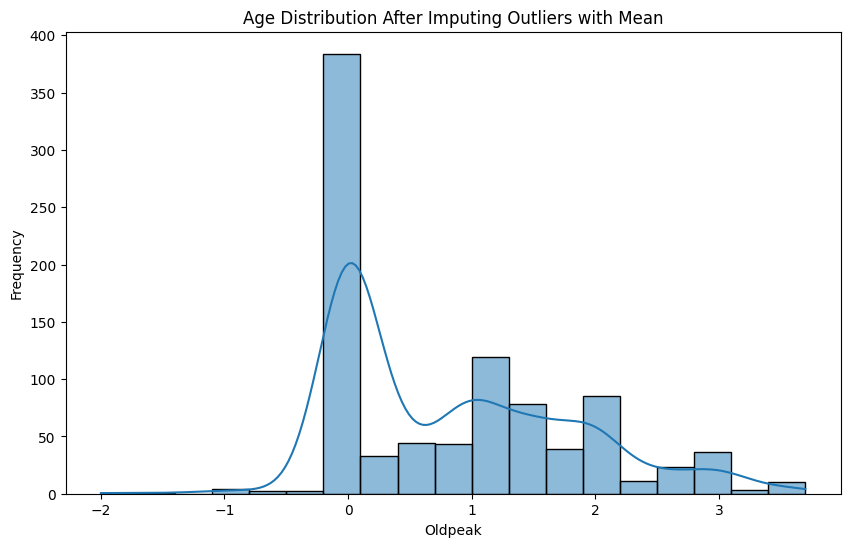

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Oldpeak'], kde=True)
plt.title('Age Distribution After Imputing Outliers with Mean')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

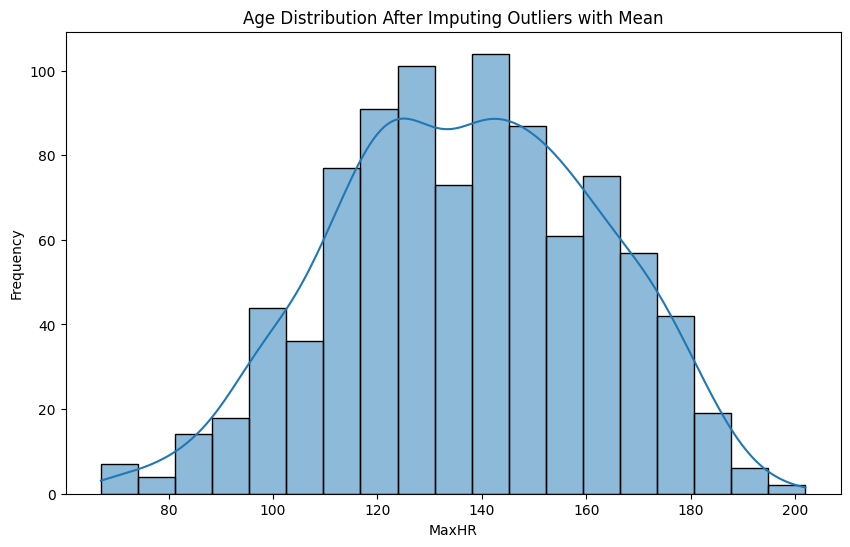

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['MaxHR'], kde=True)
plt.title('Age Distribution After Imputing Outliers with Mean')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

#### 2.3.2 Outlier kolom Cholesterol dengan persentase dari seluruh dataset 19%

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.457200,131.152617,198.799564,0.233115,136.973441,0.834420,0.553377
std,9.357937,15.597592,109.384145,0.423046,25.215612,0.957547,0.497414
min,28.000000,92.000000,0.000000,0.000000,67.000000,-2.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,3.700000,1.000000


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.457200,131.152617,234.698257,0.233115,136.973441,0.834420,0.553377
std,9.357937,15.597592,38.308958,0.423046,25.215612,0.957547,0.497414
min,28.000000,92.000000,139.000000,0.000000,67.000000,-2.000000,0.000000
25%,47.000000,120.000000,216.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,258.750000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,339.000000,1.000000,202.000000,3.700000,1.000000


In [ ]:
# Define a function for imputing outliers with the median
def impute_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    return df

# Apply the imputation for 'Cholesterol'
df = impute_outliers_with_median(df, 'Cholesterol')

# Verify the changes
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.457200  131.152617   233.255991    0.233115  136.973441   
std      9.357937   15.597592    34.825924    0.423046   25.215612   
min     28.000000   92.000000   152.000000    0.000000   67.000000   
25%     47.000000  120.000000   217.000000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   254.750000    0.000000  156.000000   
max     77.000000  170.000000   322.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.834420      0.553377  
std      0.957547      0.497414  
min     -2.000000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      3.700000      1.000000  


In [ ]:
# Hitung mean dari kolom Age
mean_age = df['Oldpeak'].mean()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ganti nilai outlier dengan mean
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: mean_age if x < lower_bound or x > upper_bound else x)

In [ ]:
# Define a function for imputing outliers with the median
def impute_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    return df

# Apply the imputation for 'Cholesterol'
df = impute_outliers_with_median(df, 'MaxHR')

# Verify the changes
print(df.describe())

            MaxHR  ExerciseAngina     Oldpeak  HeartDisease  \
count  918.000000      918.000000  918.000000    918.000000   
mean   136.976035        0.404139    0.887364      0.553377   
std     25.215656        0.490992    1.066570      0.497414   
min     67.000000        0.000000   -2.600000      0.000000   
25%    120.000000        0.000000    0.000000      0.000000   
50%    138.000000        0.000000    0.600000      1.000000   
75%    156.000000        1.000000    1.500000      1.000000   
max    202.000000        1.000000    6.200000      1.000000   

       chestpaintype_encoded  stslope_encoded  
count             918.000000       918.000000  
mean                1.452070         0.638344  
std                 0.851832         0.607056  
min                 0.000000         0.000000  
25%                 1.000000         0.000000  
50%                 2.000000         1.000000  
75%                 2.000000         1.000000  
max                 3.000000         2.000000  


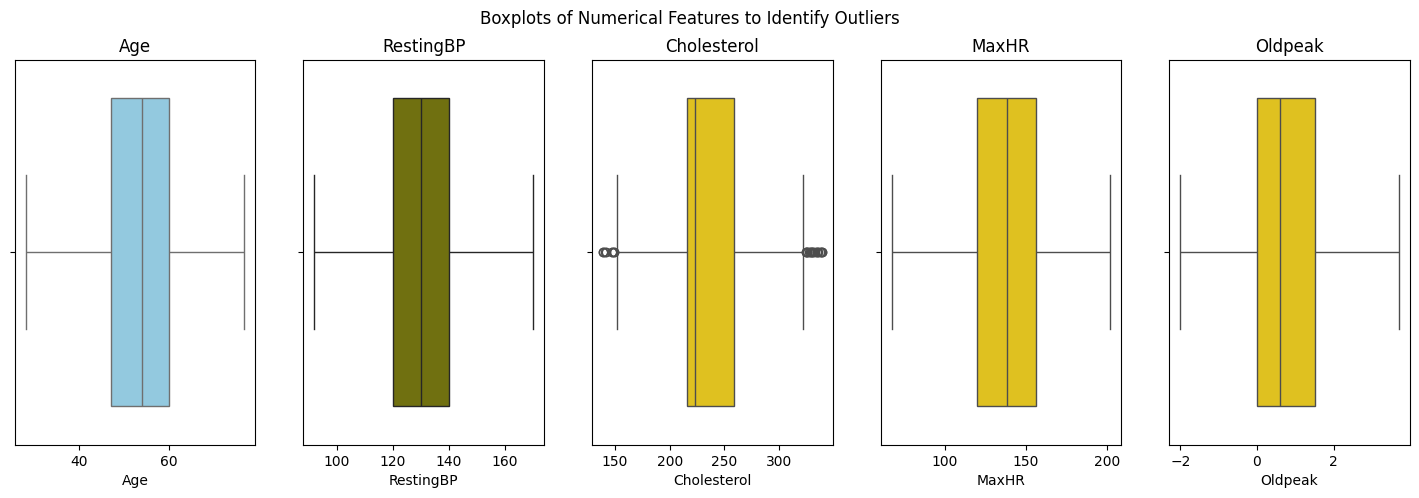

In [ ]:
# Plotting boxplots to identify outliers in the numerical columns
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
fig.suptitle('Boxplots of Numerical Features to Identify Outliers')

sns.boxplot(x=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Age')

sns.boxplot(x=df['RestingBP'], ax=axes[1], color='olive')
axes[1].set_title('RestingBP')

sns.boxplot(x=df['Cholesterol'], ax=axes[2], color='gold')
axes[2].set_title('Cholesterol')

sns.boxplot(x=df['MaxHR'], ax=axes[3], color='gold')
axes[3].set_title('MaxHR')

sns.boxplot(x=df['Oldpeak'], ax=axes[4], color='gold')
axes[4].set_title('Oldpeak')

plt.show()

In [ ]:
# Calculate the number of remaining outliers in 'Cholesterol' AFTER imputation
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

remaining_outliers = df[(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)].shape[0]
print(f"Remaining outliers in 'Cholesterol': {remaining_outliers}")

In [ ]:
# Calculate the number of remaining outliers in 'Cholesterol' AFTER imputation
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

remaining_outliers = df[(df['MaxHR'] < lower_bound) | (df['MaxHR'] > upper_bound)].shape[0]
print(f"Remaining outliers in 'MaxHR': {remaining_outliers}")

Remaining outliers in 'MaxHR': 0


In [ ]:
# Calculate the number of remaining outliers in 'Cholesterol' AFTER imputation
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

remaining_outliers = df[(df['Oldpeak'] < lower_bound) | (df['Oldpeak'] > upper_bound)].shape[0]
print(f"Remaining outliers in 'Oldpeak': {remaining_outliers}")

Remaining outliers in 'Oldpeak': 0


In [ ]:
# Calculate the total number of data points
total_data = df.shape[0]

# Calculate the number of remaining outliers in 'Cholesterol'
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

remaining_outliers = df[(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)].shape[0]

# Calculate the percentage of outliers
percentage_outliers = (remaining_outliers / total_data) * 100

print(f"Percentage of outliers in 'Cholesterol': {percentage_outliers:.2f}%")

Percentage of outliers in 'Cholesterol': 2.83%


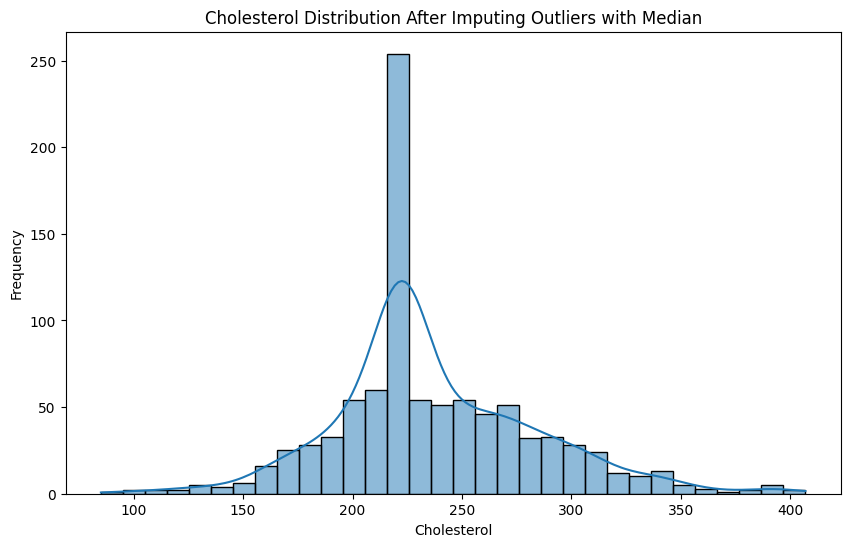

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution After Imputing Outliers with Median')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

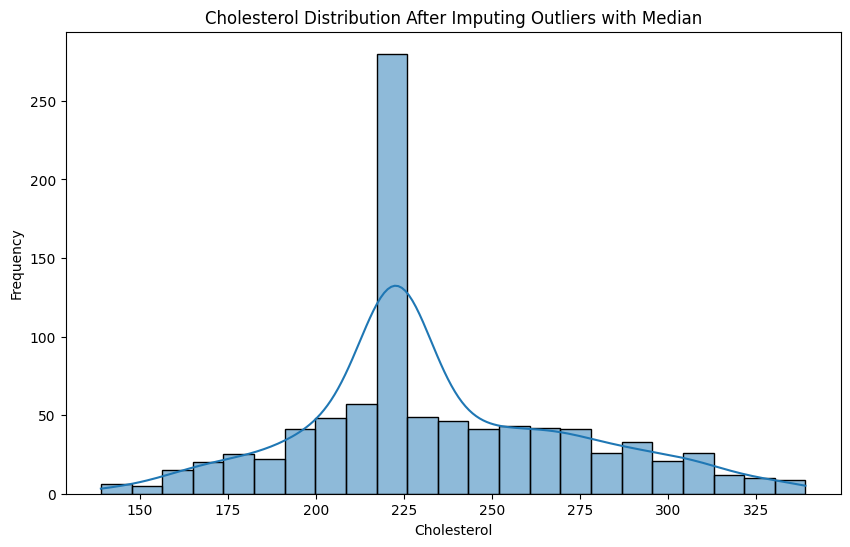

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution After Imputing Outliers with Median')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

# FEATURE ENGINEERING
Mengkonstruksi data

## 3.1 Encoding kolom dengan tipe data 'object'

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.0,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


In [ ]:
# Label Encoding untuk kolom 'Sex' dan 'ExerciseAngina'
label_encoders = {}
for col in ['Sex', 'ExerciseAngina']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding untuk kolom 'ChestPainType', 'RestingECG', dan 'ST_Slope'
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,54.0,1,140.0,289,0,172.0,0,0.0,0,True,False,False,True,False,False,True
1,49.0,0,160.0,180,0,156.0,0,1.0,1,False,True,False,True,False,True,False
2,37.0,1,130.0,283,0,98.0,0,0.0,0,True,False,False,False,True,False,True
3,48.0,0,138.0,214,0,108.0,1,1.5,1,False,False,False,True,False,True,False
4,54.0,1,150.0,195,0,122.0,0,0.0,0,False,True,False,True,False,False,True


# MODELING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Memisahkan fitur dan target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.82      0.76        77
           1       0.85      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184

Accuracy: 0.7880434782608695
Confusion Matrix:
 [[63 14]
 [25 82]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.7445652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        77
           1       0.86      0.67      0.75       107

    accuracy                           0.74       184
   macro avg       0.75      0.76      0.74       184
weighted avg       0.77      0.74      0.75       184

Confusion Matrix:
[[65 12]
 [35 72]]



Decision Tree:
Accuracy: 0.7445652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        77
           1       0.86      0.67      0.75       107

    accuracy                           0.74       184
   macro avg       0.75      0.76      0.74       184
weighted avg       0.77      0.74      0.75       184

Confusion Matrix:
[[65 12]
 [35 72]]


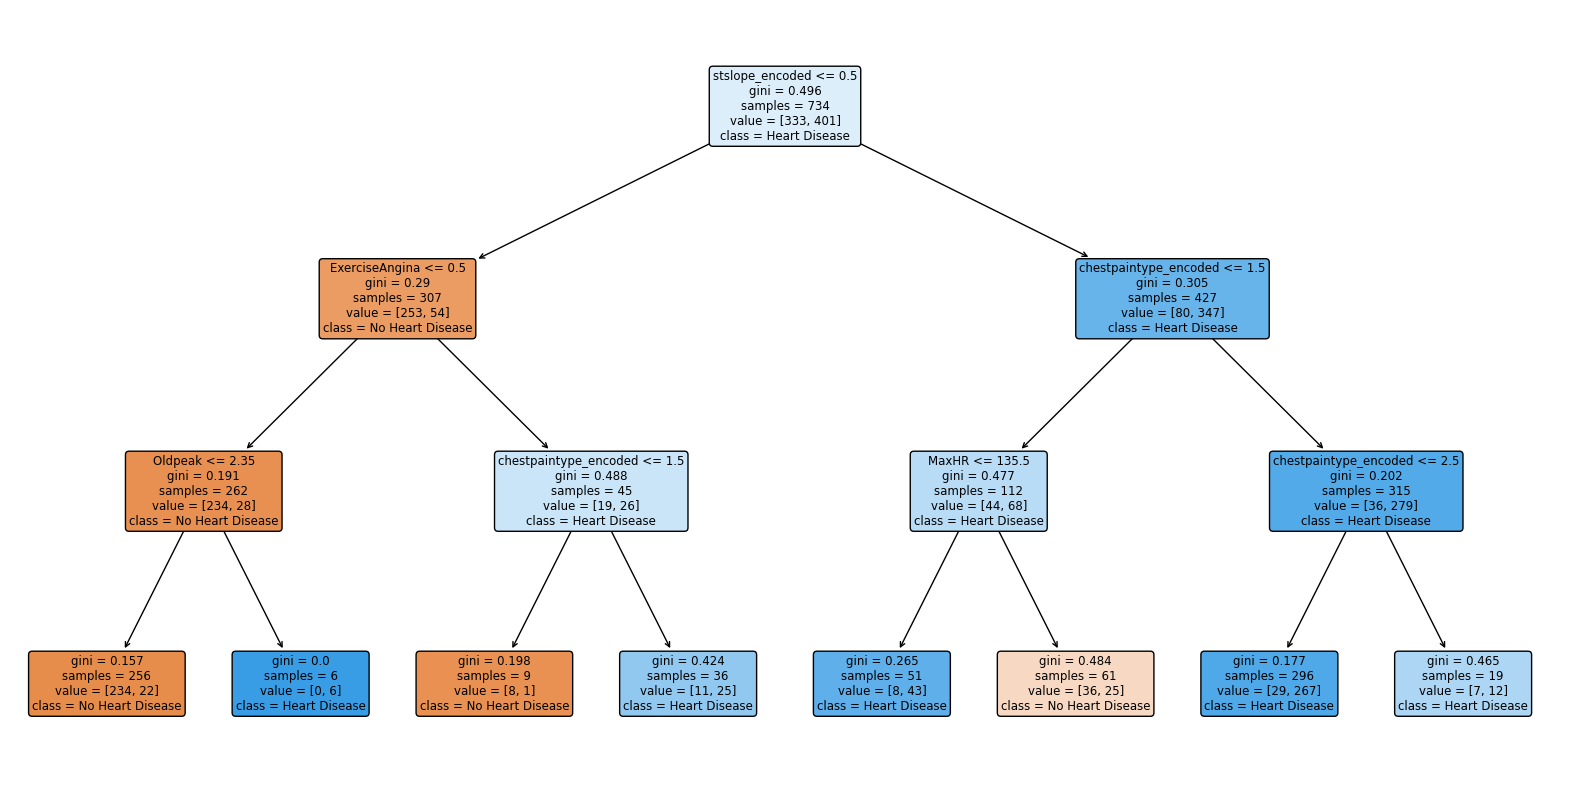

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a decision tree classifier
df = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
df.fit(X_train, y_train)
y_pred_df = df.predict(X_test)

# Evaluate the model
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(df, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, rounded=True)
plt.show()

# MISC

In [ ]:
# Simpan DataFrame ke file CSV
df.to_csv('/content/drive/MyDrive/Dataset Gcollab/modified_data.csv', index=False)

# Menggunakan file path yang sudah di-upload
df.to_csv('/content/drive/MyDrive/Dataset Gcollab/modified_heartdata.csv', index=False)

print("Data telah disimpan ke modified_heart_data.csv")

Data telah disimpan ke modified_heart_data.csv


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Fungsi untuk mengecek overfitting
def check_overfitting(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
    print("\n")

# Logistic Regression
print("Logistic Regression:")
log_reg = LogisticRegression()
check_overfitting(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest
print("Random Forest:")
rf = RandomForestClassifier()
check_overfitting(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
print("Gradient Boosting:")
gb = GradientBoostingClassifier()
check_overfitting(gb, X_train, y_train, X_test, y_test)

Logistic Regression:
Training Accuracy: 0.8637602179836512
Testing Accuracy: 0.8532608695652174
Cross-Validation Scores: [0.8707483  0.8707483  0.86394558 0.80952381 0.84246575]
Mean Cross-Validation Score: 0.851486347963843


Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.8641304347826086
Cross-Validation Scores: [0.8707483  0.89115646 0.8707483  0.85714286 0.8630137 ]
Mean Cross-Validation Score: 0.8705619233994968


Gradient Boosting:
Training Accuracy: 0.94141689373297
Testing Accuracy: 0.8532608695652174
Cross-Validation Scores: [0.85034014 0.89795918 0.86394558 0.81632653 0.83561644]
Mean Cross-Validation Score: 0.8528375733855185




In [ ]:
# Decision Tree
print("Decision Tree:")
dt = DecisionTreeClassifier()
check_overfitting(dt, X_train, y_train, X_test, y_test)

Decision Tree:
Training Accuracy: 0.8705722070844687
Testing Accuracy: 0.8478260869565217
Cross-Validation Scores: [0.82993197 0.86394558 0.82312925 0.82993197 0.81506849]
Mean Cross-Validation Score: 0.8324014537321778


